In [68]:
import os

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [69]:
f = open("C:\school\minor-ai\lettuce-cnn\data\measurements.json")
data_json = json.loads(f.read())["Measurements"]

vs = data_json.values()

df = pd.json_normalize(vs)

df.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6


In [70]:
df = df.loc[(df["Variety"] == "Lugano")]

df["ID"] = df["RGB_Image"].str.strip(".png").str.strip("RGB_")


In [71]:
df.sort_index(inplace=True)
df

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID
0,Lugano,RGB_27.png,Depth_27.png,5.5,0.42,9.0,11.0,153.9,27
1,Lugano,RGB_79.png,Depth_79.png,30.3,1.92,8.8,20.2,582.3,79
2,Lugano,RGB_140.png,Depth_140.png,60.9,2.83,11.6,19.0,960.6,140
3,Lugano,RGB_203.png,Depth_203.png,112.0,5.76,11.0,22.0,1614.9,203
4,Lugano,RGB_292.png,Depth_292.png,372.6,14.17,17.0,32.0,3839.6,292
...,...,...,...,...,...,...,...,...,...
357,Lugano,RGB_244.png,Depth_244.png,193.1,9.31,16.4,24.0,2715.4,244
358,Lugano,RGB_247.png,Depth_247.png,125.8,7.17,13.5,20.0,1957.0,247
359,Lugano,RGB_249.png,Depth_249.png,173.6,7.54,14.8,23.1,3278.3,249
360,Lugano,RGB_290.png,Depth_290.png,282.8,10.67,16.0,27.0,2741.1,290


In [72]:
df.sort_values(by="ID", ascending=False, inplace=True)



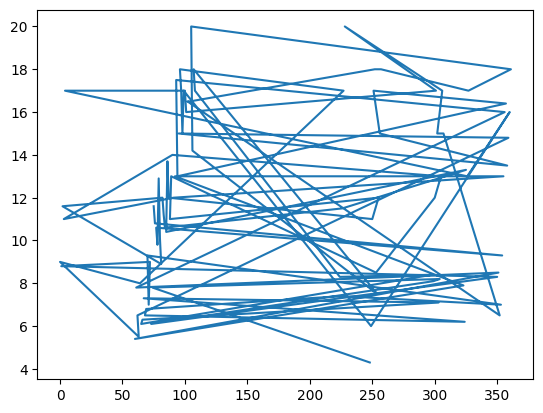

In [73]:
plt.plot(df["Height"])